In [1]:
# pip list

# import sys
# sys.executable

# sys.version

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Hypotrochoid curves

This is how [Wikipedia](https://en.wikipedia.org/wiki/Hypotrochoid) describes what hypotrochoid curves are: 
> A hypotrochoid is a roulette traced by a point attached to a circle of radius **r** rolling around the inside of a fixed circle of radius **R**, where the point is a distance **d** from the center of the interior circle. 

Visually, the definition nails down to this process:

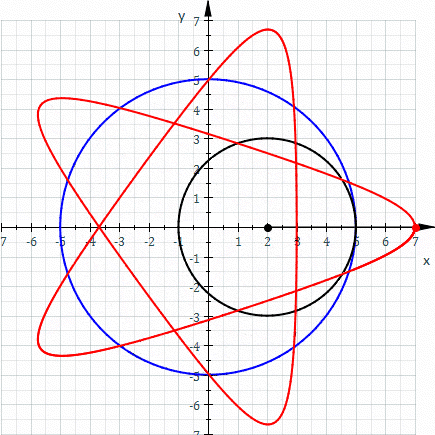

(image credits: By User:Sam Derbyshire @ en.wiki - [link](http://en.wikipedia.org/wiki/Image:HypotrochoidOutThreeFifths.gif), CC BY-SA 3.0, [image page](https://commons.wikimedia.org/w/index.php?curid=3421430))


This implementation follows the parametric formulae found at the same page. You need to provide the three parameters: R, r, and d.

In [3]:
def get_x(R, r, d, phi):
    return (R-r)*math.cos(phi) + d*math.cos(phi*(R-r)/r)

def get_y(R, r, d, phi):
    return (R-r)*math.sin(phi) - d*math.sin(phi*(R-r)/r)
    
# find the smallest common multiple
# in Python 3.8 there is no math.lcm -> use numpy
# multip = np.lcm(r, R)
# print(multip)    

In [4]:
def prepare_curve_data(R,r,d,steps=1000):
    """
    steps ... how many points are plotted; smaller value creates a smoother pattern with larger size
    """
    multip = np.lcm(r, R)
    phi_grid_rad = np.linspace(0, 2*math.pi*multip/R, steps)
    #phi_grid_deg = [math.degrees(phi) for phi in phi_grid_rad]
    coord_x = [get_x(R,r,d,phi_val) for phi_val in phi_grid_rad]
    coord_y = [get_y(R,r,d,phi_val) for phi_val in phi_grid_rad]
    return (coord_x, coord_y)

In [5]:
# Voila app

In [6]:
# TODO: only allow integers with some reasonable range (integer -> easy to find the smallest comon multiple)
list_R = range(5,15)
list_r = range(1,14)
list_d = range(3,13)
dict_color= {'blue':'b', 'green':'g', 'red':'r','cyan':'c','magenta':'m','yellow':'y','black':'k'}
list_color_names = dict_color.keys()

In [7]:
#!pip install markdown

In [8]:
import ipywidgets as widgets
#from IPython.display import display
from ipywidgets import * # HBox, VBox, Layout, HTML
#import markdown

In [9]:
sel_R = widgets.RadioButtons(
    options = list_R,
    description='R:',
    disabled=False,
    value = 5 #random.choice(list_R)
)

sel_r = widgets.RadioButtons(
    options = list_r,
    description='r:',
    disabled=False,
    value = 3 #random.choice(list_r)
)

sel_d = widgets.RadioButtons(
    options = list_d,
    description='d:',
    disabled=False,
    value = 5 #random.choice(list_d)
)

sel_color = widgets.RadioButtons(
    options = list_color_names,
    description='color:',
    disabled=False,
    value = 'magenta'
)

In [10]:
def plot_the_curve(curve_data, plot_color_letter, title=None, filename=None):
    x_data = curve_data[0]
    y_data = curve_data[1]
    max_value = 1.1*max(max(x_data, key=abs), max(y_data, key=abs))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim([-max_value, max_value])
    ax.set_ylim(ax.get_xlim())
    ax.set_axis_off()
    # plt.scatter(x=x_data, y=y_data)
    #display(plt.plot(x_data, y_data, '--'))
    plt.plot(x_data, y_data, '-'+plot_color_letter)
    if title:
        plt.title(title)
    if filename:
        # disable as it makes Binder fail
        pass
        os.makedirs("saved_curves", exist_ok=True)
        plt.savefig(os.path.join("saved_curves", filename), bbox_inches='tight')
        
    # For voila and matplotlib to work properly (i.e. replace the existing plot, rather than appending) the show() must be used.
    plt.show()

In [11]:
button = widgets.Button(description="Plot the curve") #, layout=Layout(width='20%'))


output = widgets.Output() #layout=Layout(width='20%'))
display(output)

def on_button_clicked(button):
    with output:
        output.clear_output()
        
        R = sel_R.value
        r = sel_r.value
        d = sel_d.value
        color_letter = dict_color.get(sel_color.value)

        curve_data = prepare_curve_data(R,r,d)
        ttl = f"R={R}, r={r}, d={d}"
        filename = f"curve__R_{R}__r_{r}__d_{d}_{sel_color.value}.png"
        plot_the_curve(curve_data, color_letter, title=ttl, filename=filename)
        
button.on_click(on_button_clicked)

Output()

In [12]:
HBox([sel_R, sel_r, sel_d, sel_color, button])

In [13]:
# PLOTTING DISABLED DUE TO VOILA

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_xlim([-max_value, max_value])
# ax.set_ylim(ax.get_xlim())
# ax.set_axis_off()

# plt.plot(x_data, y_data, '--')
# plt.savefig('aaa.png', format='png')

These are special cases: 

* a straight line: R = 6, r = 3, d = 3
* a circle: R = 6, r = 3, d = 0
* a point: R = r
* an elipsis: R = 2$\cdot$r

In [14]:
## testing

# for R in list_R:
#     for r in list_r:
#         for d in list_d:
#             if (R == r) | (d==0) | (R != 2*r):
#                 pass
#             else:
#                 curve_data = prepare_curve_data(R,r,d)
#                 ttl = f"R={R}, r={r}, d={d}"
#                 plot_the_curve(curve_data, title=ttl)